In [25]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
# from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc,precision_recall_curve,roc_curve
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix,classification_report,fbeta_score,auc,precision_recall_curve
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
# 预处理 缺失值填充
from sklearn.impute import SimpleImputer

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data = pd.read_csv('./loan_data_set.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
imp_mean = SimpleImputer(missing_values = np.nan,strategy = "mean")
imp_most = SimpleImputer(missing_values = np.nan,strategy = "most_frequent")
# 特征标签分离(X,Y)
Y = data.Loan_Status
X = data.drop(["Loan_ID" ,"Loan_Status"],axis=1)
# 数值型特征用均值填充
X[['LoanAmount','Loan_Amount_Term','Credit_History']]=imp_mean.fit_transform(X[['LoanAmount','Loan_Amount_Term','Credit_History']])
# 非数值型数据用众数填充
X[['Gender','Married','Dependents','Self_Employed']] = imp_most.fit_transform(data[['Gender','Married','Dependents','Self_Employed']])



In [10]:
X = pd.get_dummies(X)

In [11]:
X

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,146.412162,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.000000,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.000000,360.0,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.000000,360.0,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.000000,360.0,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360.0,1.0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.000000,180.0,1.0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,0
611,8072,240.0,253.000000,360.0,1.0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
612,7583,0.0,187.000000,360.0,1.0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1


In [12]:
Y = Y.map({"Y":1,"N":0})
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=10)

In [13]:
model_DF = DecisionTreeClassifier(random_state=10)
model_DF.fit(X_train,y_train)
model_DF.score(X_test,y_test)

0.7207792207792207

In [14]:
model_LR = LogisticRegression(random_state=2)
model_LR.fit(X_train,y_train)
model_LR.score(X_test,y_test)

0.7922077922077922

In [15]:
model_svc = SVC(random_state=10)
model_svc.fit(X_train,y_train)
model_svc.score(X_test,y_test)

0.7337662337662337

In [16]:
model_knn = KNeighborsClassifier(n_neighbors=7)
model_knn.fit(X_train,y_train)
model_knn.score(X_test,y_test)

0.6688311688311688

# Bagging

In [17]:
%%time
bag_DF = BaggingClassifier(n_estimators=100,base_estimator=DecisionTreeClassifier(random_state=10),
                          oob_score=True,random_state=10,bootstrap=True)
bag_DF.fit(X_train,y_train)

CPU times: total: 219 ms
Wall time: 223 ms


BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=10),
                  n_estimators=100, oob_score=True, random_state=10)

In [18]:
bag_DF.score(X_test,y_test)

0.7597402597402597

In [19]:
X_pred1 = bag_DF.predict(X_test)
print(classification_report(y_test,X_pred1))

              precision    recall  f1-score   support

           0       0.58      0.37      0.45        41
           1       0.80      0.90      0.85       113

    accuracy                           0.76       154
   macro avg       0.69      0.63      0.65       154
weighted avg       0.74      0.76      0.74       154



In [20]:
%%time
bag_DF.oob_score_

CPU times: total: 0 ns
Wall time: 0 ns


0.7847826086956522

In [21]:
y_pred_Bag = bag_DF.predict(X_test)

In [22]:
f1_score(y_test,y_pred_Bag,pos_label=0)

0.44776119402985076

In [26]:
# fbeta = 1+beta*beta/(beta*beta/reacll+1/precision)
fbeta_score(y_test,y_pred_Bag,beta=100,pos_label=0)

0.36586704257778774

In [28]:
model_LR = LogisticRegression(random_state=10)
bag_LR = BaggingClassifier(n_estimators=100,base_estimator=model_LR,
                          oob_score=True,random_state=10)
bag_LR.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(random_state=10),
                  n_estimators=100, oob_score=True, random_state=10)

In [29]:
model_LR=LogisticRegression(class_weight="balance",random_state=10)
bag_LR=BaggingClassifier(n_estimators=100,base_estimator = model_LR,
                        oob_score=True,random_state=10)
bag_LR.fit(X_train,y_train)

BaggingClassifier(base_estimator=LogisticRegression(class_weight='balance',
                                                    random_state=10),
                  n_estimators=100, oob_score=True, random_state=10)

In [30]:
bag_LR.score(X_test,y_test)

0.7987012987012987

In [31]:
y_pred_LR = bag_LR.predict(X_test)

In [32]:
print(classification_report(y_test,y_pred_LR))

              precision    recall  f1-score   support

           0       0.78      0.34      0.47        41
           1       0.80      0.96      0.88       113

    accuracy                           0.80       154
   macro avg       0.79      0.65      0.68       154
weighted avg       0.80      0.80      0.77       154



In [34]:
bag_svc = BaggingClassifier(n_estimators=100,base_estimator = SVC(),
                           oob_score=True,random_state=10)
bag_svc.fit(X_train,y_train)
bag_svc.score(X_test,y_test)

0.7337662337662337

In [36]:
bag_KNN = BaggingClassifier(n_estimators=100,base_estimator=KNeighborsClassifier(),
                           oob_score=True,random_state=10)
bag_KNN.fit(X_train,y_train).score(X_test,y_test)

0.6493506493506493

# 随机森林

In [37]:
bag_RFC = RandomForestClassifier(n_estimators=100,oob_score=True,random_state=10)
bag_RFC.fit(X_train,y_train).score(X_test,y_test)

0.7987012987012987

In [38]:
grid_n = list(range(20,101,20))
oob_score = []
accuracy_score = []
for i in grid_n:
    model = RandomForestClassifier(n_estimators=i,random_state=10,oob_score=True)
    model.fit(X_train,y_train)
    oob_score.append(model.oob_score_)
    accuracy_score.append(model.score(X_test,y_test))

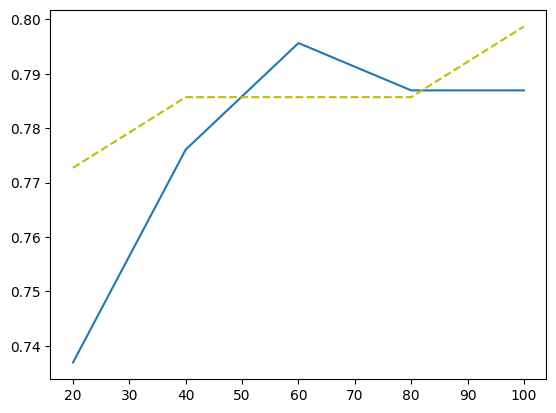

In [40]:
plt.plot(grid_n,oob_score)
plt.plot(grid_n,accuracy_score,"y--")

# boosting

In [41]:
from sklearn.ensemble import AdaBoostClassifier
model_ada = AdaBoostClassifier(n_estimators=100,random_state=10,algorithm="SAMME")
model_ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=100, random_state=10)

In [42]:
model_ada.score(X_test,y_test)

0.8181818181818182

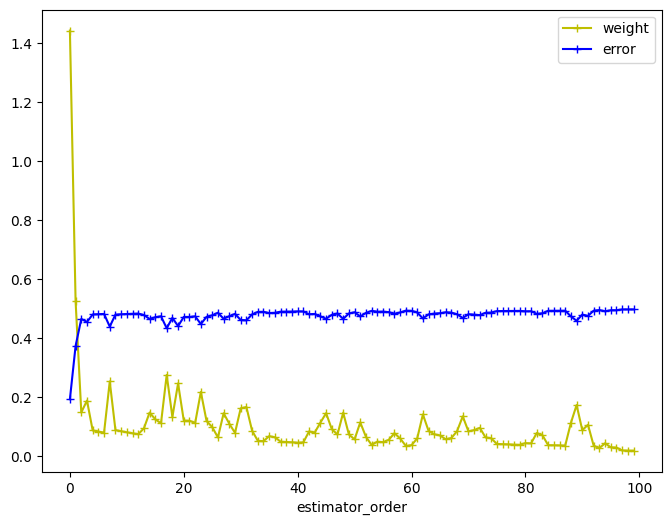

In [43]:
plt.figure(figsize=(8,6))
plt.plot(model_ada.estimator_weights_,'y-+',label="weight")
plt.plot(model_ada.estimator_errors_,"b-+",label="error")
plt.xlabel("estimator_order")
plt.legend()

<AxesSubplot:>

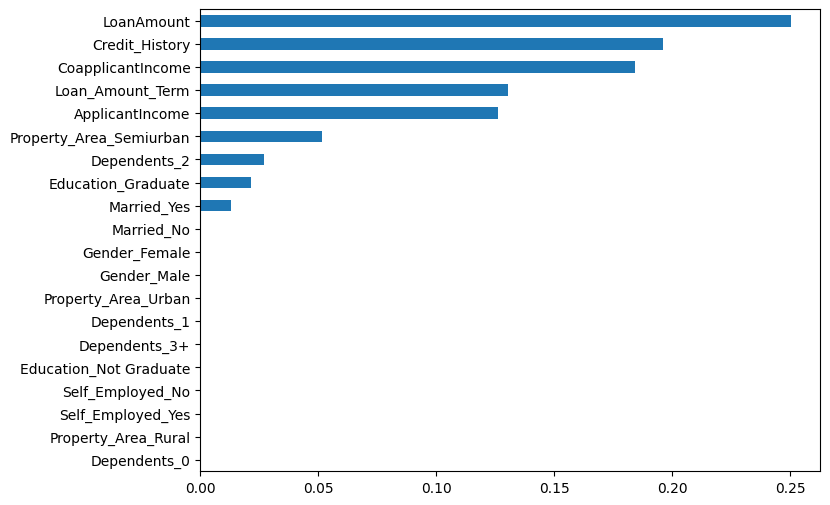

In [44]:
plt.figure(figsize=(8,6))
pd.Series(model_ada.feature_importances_,index=X_train.columns).sort_values().plot(kind="barh")

In [45]:
grid_rate = np.linspace(0.01,1,10)

In [46]:
error = []
for i in grid_rate:
    model = AdaBoostClassifier(random_state=10,learning_rate=i)
    model.fit(X_train,y_train)
    error.append(model.score(X_train,y_train))

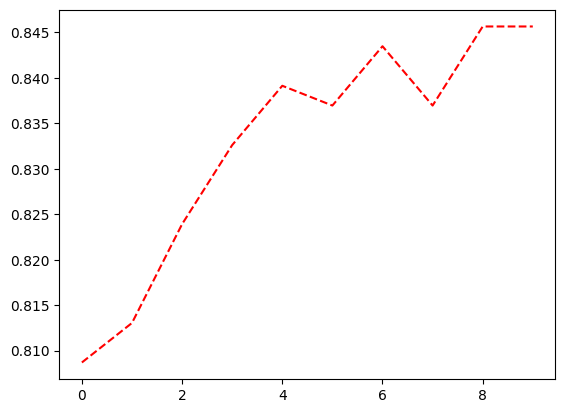

In [47]:
plt.plot(error,'r--',label="rate")

# Gradient Boosting Decision Tree

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

In [49]:
model_gbdt = GradientBoostingClassifier(random_state=10,subsample=.7)
model_gbdt.fit(X_train,y_train)

GradientBoostingClassifier(random_state=10, subsample=0.7)

In [51]:
model_gbdt.score(X_test,y_test)

0.7987012987012987

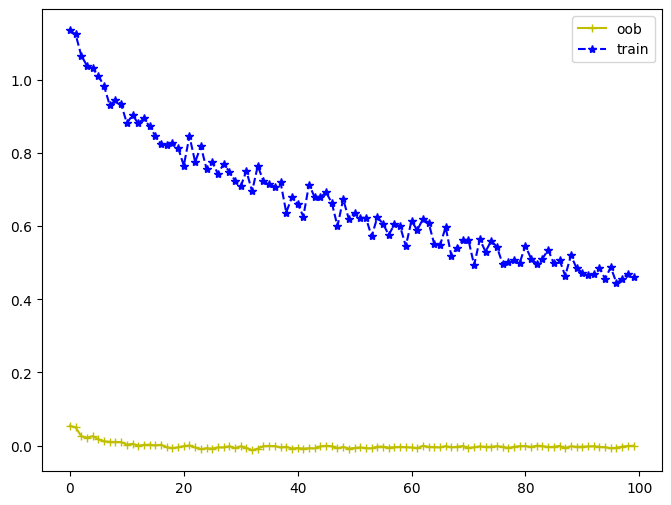

In [52]:
plt.figure(figsize=(8,6))
plt.plot(model_gbdt.oob_improvement_,'y+-',label="oob")
plt.plot(model_gbdt.train_score_,'b--*',label="train")
plt.legend()

# Volting Classifier 硬投票  软投票

In [59]:
from sklearn.ensemble import VotingClassifier

In [60]:
model_vote_hard = VotingClassifier(estimators=[("DF",model_DF),("LR",model_LR)])
model_vote_hard.fit(X_train,y_train)

VotingClassifier(estimators=[('DF', DecisionTreeClassifier(random_state=10)),
                             ('LR',
                              LogisticRegression(class_weight='balance',
                                                 random_state=10))])

In [63]:
y_pred_v_h = model_vote_hard.predict(X_test)

In [64]:
print(classification_report(y_test,y_pred_v_h))

              precision    recall  f1-score   support

           0       0.46      0.59      0.52        41
           1       0.83      0.75      0.79       113

    accuracy                           0.71       154
   macro avg       0.65      0.67      0.65       154
weighted avg       0.73      0.71      0.72       154



In [65]:
model_vote_soft = VotingClassifier(estimators=[("DF",model_DF),("LR",model_LR)],voting="soft")
model_vote_soft.fit(X_train,y_train).score(X_test,y_test)

0.7207792207792207

In [66]:
best_rf = RandomForestClassifier(max_features=6,n_estimators =500,random_state=10)
best_gbdt = GradientBoostingClassifier(n_estimators=200,learning_rate=0.01,subsample=0.3,random_state=10)
model_vote_hard = VotingClassifier(estimators=[("RF",best_rf),("gbdt",best_gbdt)])
model_vote_hard.fit(X_train,y_train)


VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(max_features=6,
                                                     n_estimators=500,
                                                     random_state=10)),
                             ('gbdt',
                              GradientBoostingClassifier(learning_rate=0.01,
                                                         n_estimators=200,
                                                         random_state=10,
                                                         subsample=0.3))])

In [67]:
model_vote_soft.score(X_test,y_test)

0.7207792207792207

In [71]:
beat_rf = RandomForestClassifier(max_features=6,n_estimators=500,random_state=10)
best_gbdt = GradientBoostingClassifier(n_estimators=200,learning_rate=0.01,subsample=0.3,random_state=10)
model_vote_hard = VotingClassifier(estimators=[("RF",beat_rf),("gbdt",best_gbdt)])
model_vote_hard.fit(X_train,y_train)

VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(max_features=6,
                                                     n_estimators=500,
                                                     random_state=10)),
                             ('gbdt',
                              GradientBoostingClassifier(learning_rate=0.01,
                                                         n_estimators=200,
                                                         random_state=10,
                                                         subsample=0.3))])

In [72]:
model_vote_soft.score(X_test,y_test)

0.7207792207792207

In [76]:
best_rf = RandomForestClassifier(max_features=6,n_estimators = 500,random_state=10)
best_gbdt = GradientBoostingClassifier(n_estimators=200,learning_rate=0.01,subsample=0.3,random_state=10)
model_vote_soft_w = VotingClassifier(estimators=[("RF",best_rf),("gbdt",best_gbdt)],voting="soft",weights=[0.76,0.73])
model_vote_soft_w.fit(X_train,y_train).score(X_test,y_test)

0.8116883116883117